Try and find two catgeories that can be combined.

In [15]:
from pathlib import Path
# Load the softmax encodings of the data

from simcoder.similarity import load_mf_encodings

smData = load_mf_encodings(Path('/Volumes/Data/mf_resnet50_softmax'))

# Load the data

allData = load_mf_encodings(Path("/Volumes/Data/mf_dino2")) # load encodings

from simcoder.msedOO import l1_norm

allData = l1_norm(allData)


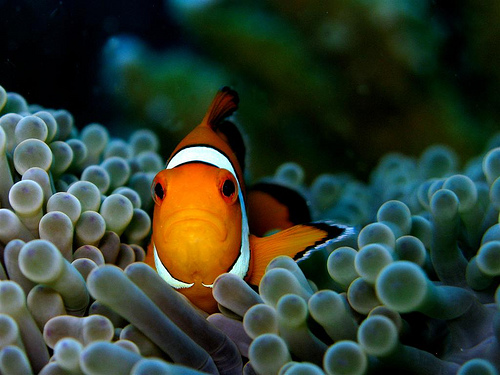

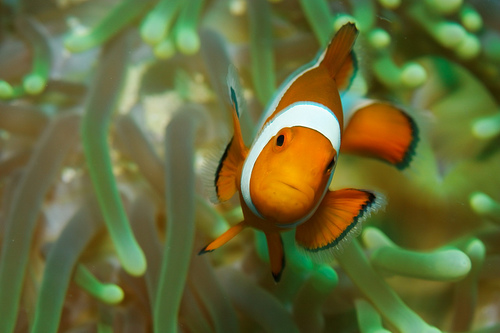

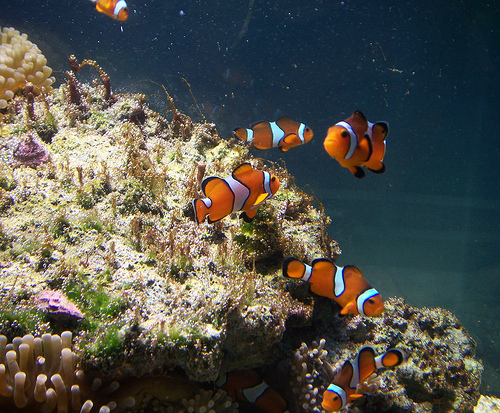

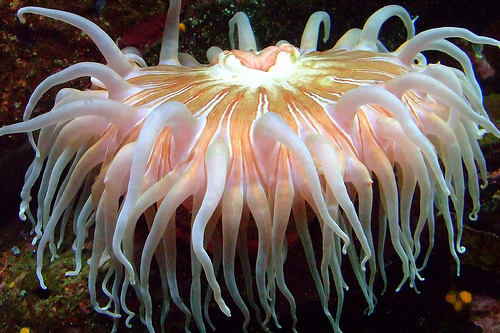

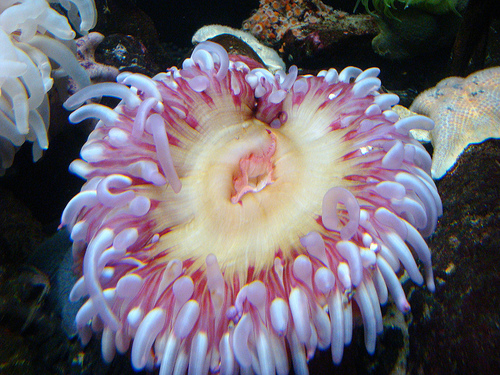

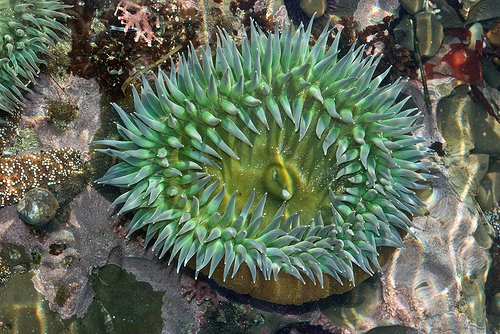

In [16]:
from simcoder.count_cats import get_best_cat_index
from simcoder.similarity import get_mf_image

# subtract 1 from the file numbers

cat1 = 393 # anemone fish
cat2 = 973 # coral reef
cat2 = 108 # sea anemone

indexes_for_cat1 = get_best_cat_index(cat1,smData)
indexes_for_cat2 = get_best_cat_index(cat2,smData)

cat1_index1 = indexes_for_cat1[0]
cat1_index2 = indexes_for_cat1[1]   # bottles
cat1_index3 = indexes_for_cat1[2]

cat2_index1 = indexes_for_cat2[0]
cat2_index2 = indexes_for_cat2[1]   # glasses
cat2_index3 = indexes_for_cat2[2]

display(get_mf_image(cat1_index1))
display(get_mf_image(cat1_index2))
display(get_mf_image(cat1_index3))
display(get_mf_image(cat2_index1))
display(get_mf_image(cat2_index2))
display(get_mf_image(cat2_index3))

In [17]:
from simcoder.msedOO import msed
import numpy as np

base_data = np.vstack((allData[cat1_index1],allData[cat1_index2],allData[cat1_index3],allData[cat2_index1],allData[cat2_index2],allData[cat2_index3]))   

base = msed(base_data)  # form the base simplex 

complexities = base.msed(allData)


In [18]:

complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]


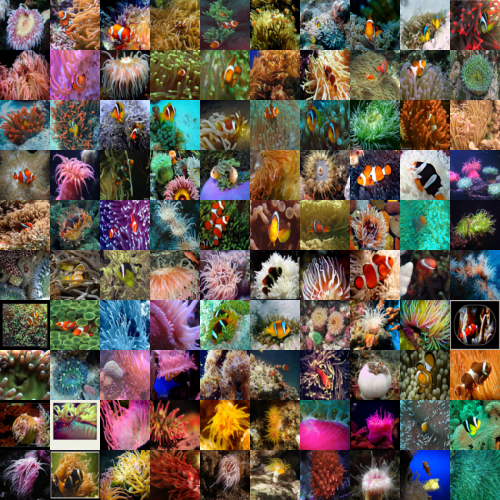

In [19]:
from simcoder.similarity import make_mf_image_grid

make_mf_image_grid(top_100,10,10,50,50)

/Users/al/repos/simcoder-pytorch/simcoder/msedOO.py:17: RuntimeWarning: overflow encountered in exp
  C = np.exp(cs)                              # C is of shape matrix of no_of_objects,1 print(f"C shape {C.shape}")


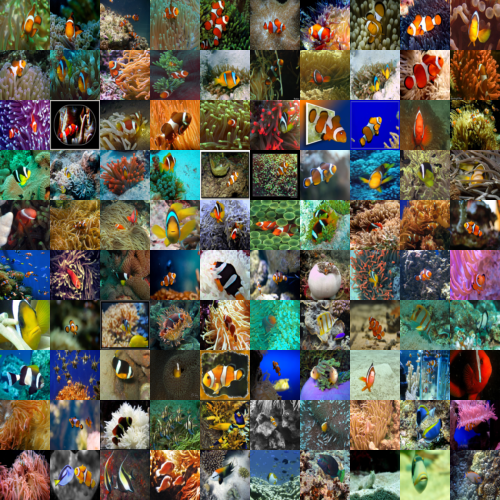

In [20]:
# now try just bottles

base_data = np.vstack((allData[cat1_index1],allData[cat1_index2],allData[cat1_index3]) )  

base = msed(base_data)  # form the base simplex 
complexities = base.msed(allData)
complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]
make_mf_image_grid(top_100,10,10,50,50)

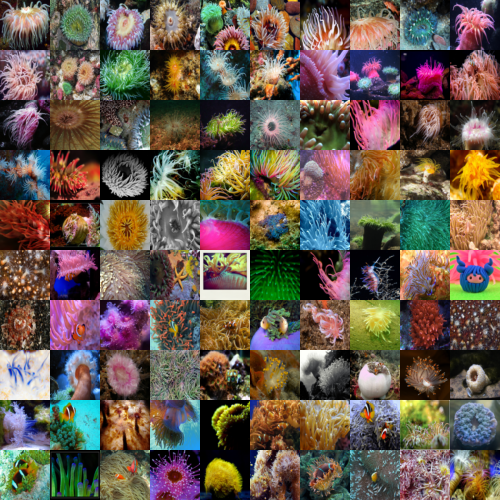

In [21]:
# now try just glasses

base_data = np.vstack((allData[cat2_index1],allData[cat2_index2],allData[cat2_index3]) )  

base = msed(base_data)  # form the base simplex 
complexities = base.msed(allData)
complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]
make_mf_image_grid(top_100,10,10,50,50)